Loaded 64 images and 64 labels.


2024-11-18 11:13:08.491021: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/10


2024-11-18 11:13:13.548004: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 67108864 exceeds 10% of free system memory.
2024-11-18 11:13:13.757956: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 33554432 exceeds 10% of free system memory.
2024-11-18 11:13:14.616265: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 33554432 exceeds 10% of free system memory.
2024-11-18 11:13:15.145809: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 33554432 exceeds 10% of free system memory.
2024-11-18 11:13:15.148758: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 67108864 exceeds 10% of free system memory.


2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - loss: 39.0102 - mae: 4.7771 - val_loss: 2.5448 - val_mae: 1.3846
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - loss: 30.5807 - mae: 3.4504 - val_loss: 2.2614 - val_mae: 1.2662
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - loss: 24.7684 - mae: 2.7007 - val_loss: 2.5823 - val_mae: 1.4191
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - loss: 22.2528 - mae: 2.9390 - val_loss: 12.9159 - val_mae: 3.2830
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - loss: 26.7844 - mae: 4.2167 - val_loss: 3.1293 - val_mae: 1.6025
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - loss: 19.8518 - mae: 2.6287 - val_loss: 2.7494 - val_mae: 1.4163
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 987ms/step - loss: 28.1210 - mae: 3.1485 - val_loss: 6.9119 - val_mae: 2.2793
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 974ms/step - loss: 24.8452 - mae: 3.6489 - val_loss: 4.5032 - val_mae: 1.9535
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - loss: 20.1202 - mae: 2.8011 - val_loss: 3.5

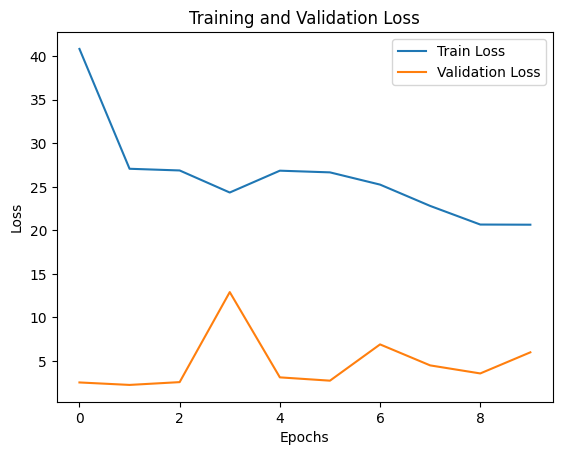

[ WARN:0@99.497] global loadsave.cpp:241 findDecoder imread_('Predict/pr_4.jpg'): can't open/read file: check file path/integrity


error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
#from tf.keras import layers, models
#from tensorflow.tsl import models, lay
import matplotlib.pyplot as plt
import json

def load_data(image_folder, img_height, img_width):
    """
    Load images and their corresponding labels from a folder.

    Args:
        image_folder (str): Path to the folder containing image and JSON files.
        img_height (int): Desired height for resizing images.
        img_width (int): Desired width for resizing images.

    Returns:
        images (np.ndarray): Array of preprocessed images.
        labels (np.ndarray): Array of labels (number of objects in each image).
    """
     # Initialize lists for images and labels
    image_paths = [os.path.join(image_folder, f) for f in os.listdir(image_folder) if f.endswith('.jpg')]
    images = []
    labels = []

    for img_path in image_paths:
        # Derive the corresponding JSON file path
        json_file = img_path.replace('.jpg', '.json')

        # Check if JSON file exists
        if not os.path.exists(json_file):
            print(f"Warning: Missing JSON file for {img_path}")
            continue

        # Load the label from the JSON file
        with open(json_file, 'r') as f:
            data = json.load(f)
            # Count the number of shapes (annotations)
            labels.append(len(data.get('Scar', [])))

        # Load and preprocess the image
        img = cv2.imread(img_path)
        if img is None:
            print(f"Warning: Unable to read image {img_path}")
            continue
        img = cv2.resize(img, (img_width, img_height))  # Resize image
        img = img.astype('float32') / 255.0  # Normalize to [0, 1]
        images.append(img)

    # Convert lists to numpy arrays
    images = np.array(images)
    labels = np.array(labels)

    return images, labels


# Parameters
image_folder = 'LF4 dataset'
img_height, img_width = 128, 128  # Example dimensions

# Load the data
images, labels = load_data(image_folder, img_height, img_width)
print(f"Loaded {len(images)} images and {len(labels)} labels.")


# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# 3. Build the CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(shape=(img_height, img_width, 3)),  # Input layer (RGB image)
    
    # Convolutional layers with ReLU activation and max-pooling
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    # Flatten the output from the convolutional layers
    tf.keras.layers.Flatten(),
    
    # Dense layers to make predictions
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1)  # Single output node (number of objects)
])

# 4. Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# 5. Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# 6. Evaluate the model
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test MAE: {test_mae}')

# 7. Visualize training history
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# 8. Make predictions on a new image
new_image_path = 'Predict/pr_4.jpg'
img = cv2.imread(new_image_path)
img = cv2.resize(img, (img_height, img_width))
img = img.astype('float32') / 255.0  # Normalize

# Predict the number of objects
predicted_objects = model.predict(np.expand_dims(img, axis=0))  # Add batch dimension
print(f'Predicted number of objects: {predicted_objects[0][0]}')


Loaded 64 images and 64 labels.
Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 20s 5s/step - loss: 41.3342 - mae: 4.3987 - val_loss: 6.2721 - val_mae: 2.2102
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step - loss: 26.0501 - mae: 3.3912 - val_loss: 2.5034 - val_mae: 1.3880
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step - loss: 23.9823 - mae: 3.1017 - val_loss: 13.9287 - val_mae: 3.4430
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 4s/step - loss: 27.0315 - mae: 4.1968 - val_loss: 2.4345 - val_mae: 1.3508
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - loss: 29.1241 - mae: 3.0756 - val_loss: 2.5812 - val_mae: 1.3079
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - loss: 27.0295 - mae: 2.6627 - val_loss: 5.2541 - val_mae: 2.0294
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 5s/step - loss: 19.7789 - mae: 3.0612 - val_loss: 10.7375 - val_mae: 2.8381
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 5s/step - loss: 23.1490 - mae: 3.7300 - val_loss: 4.1884 - val_mae: 1.8306
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 12s 6s/step - lo

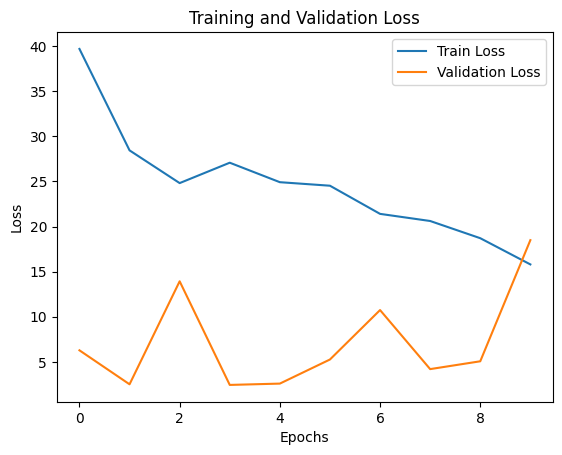

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


Predicted number of objects: 6.380908966064453
Accuracy: 77.82%
Model saved to leaf_detection_model.h5


Model loaded successfully.


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted number of objects (from loaded model): 6.380908966064453


In [3]:
import os
import cv2
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
#from tf.keras import layers, models
#from tensorflow.tsl import models, lay
import matplotlib.pyplot as plt
import json

def load_data(image_folder, img_height, img_width):
    """
    Load images and their corresponding labels from a folder.

    Args:
        image_folder (str): Path to the folder containing image and JSON files.
        img_height (int): Desired height for resizing images.
        img_width (int): Desired width for resizing images.

    Returns:
        images (np.ndarray): Array of preprocessed images.
        labels (np.ndarray): Array of labels (number of objects in each image).
    """
    # Initialize lists for images and labels
    image_paths = [os.path.join(image_folder, f) for f in os.listdir(image_folder) if f.endswith('.jpg')]
    images = []
    labels = []

    for img_path in image_paths:
        # Derive the corresponding JSON file path
        json_file = img_path.replace('.jpg', '.json')

        # Check if JSON file exists
        if not os.path.exists(json_file):
            print(f"Warning: Missing JSON file for {img_path}")
            continue

        # Load the label from the JSON file
        with open(json_file, 'r') as f:
            data = json.load(f)
            # Count the number of shapes (annotations)
            labels.append(len(data.get('shapes', [])))

        # Load and preprocess the image
        img = cv2.imread(img_path)
        if img is None:
            print(f"Warning: Unable to read image {img_path}")
            continue
        img = cv2.resize(img, (img_width, img_height))  # Resize image
        img = img.astype('float32') / 255.0  # Normalize to [0, 1]
        images.append(img)

    # Convert lists to numpy arrays
    images = np.array(images)
    labels = np.array(labels)

    return images, labels


# Parameters
image_folder = 'LF4 dataset'
img_height, img_width = 128, 128  # Example dimensions

# Load the data
images, labels = load_data(image_folder, img_height, img_width)
print(f"Loaded {len(images)} images and {len(labels)} labels.")


# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# 3. Build the CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(shape=(img_height, img_width, 3)),  # Input layer (RGB image)
    
    # Convolutional layers with ReLU activation and max-pooling
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    # Flatten the output from the convolutional layers
    tf.keras.layers.Flatten(),
    
    # Dense layers to make predictions
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1)  # Single output node (number of objects)
])

# 4. Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# 5. Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# 6. Evaluate the model
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test MAE: {test_mae}')

# 7. Visualize training history
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# 8. Make predictions on a new image
new_image_path = 'LF4 dataset/20241118_111111.jpg'
img = cv2.imread(new_image_path)
img = cv2.resize(img, (img_height, img_width))
img = img.astype('float32') / 255.0  # Normalize


# Predict the number of objects
predicted_objects = model.predict(np.expand_dims(img, axis=0))  # Add batch dimension
print(f'Predicted number of objects: {predicted_objects[0][0]}')

# Print accuracy to console
accuracy = (test_mae / labels.mean()) * 100
print(f"Accuracy: {accuracy:.2f}%")

# 9. Save the model
model_save_path = 'leaf_detection_model.h5'
model.save(model_save_path)
print(f"Model saved to {model_save_path}")

# Load the model (optional, for testing the save functionality)
loaded_model = tf.keras.models.load_model(model_save_path)
print("Model loaded successfully.")

# Make predictions with the loaded model (optional)
predicted_objects_loaded = loaded_model.predict(np.expand_dims(img, axis=0))
print(f'Predicted number of objects (from loaded model): {predicted_objects_loaded[0][0]}')

